<a href="https://colab.research.google.com/github/Danelu19/Machine-Learning-Activities/blob/main/LastLabML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

Importing libraries

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,QuantileTransformer
import matplotlib.pyplot as plt

Reading the dataset

In [ ]:
url = "https://raw.githubusercontent.com/erickedu85/dataset/master/age_income.csv"
df = pd.read_csv(url)

Knowing the structure and data types of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               150 non-null    int64
 1   annual_income($)  150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


Visualizing the dataset

Text(0, 0.5, 'Annual income ($)')

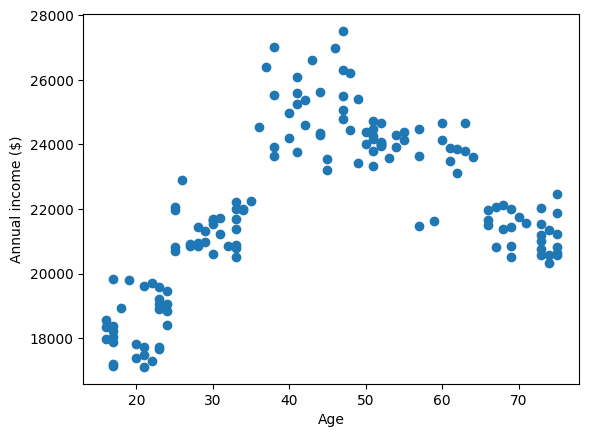

In [ ]:
plt.scatter(df['age'],df['annual_income($)'])
plt.xlabel('Age')
plt.ylabel('Annual income ($)')

**Question 1**: Why use a scatterplot to visualize this dataset?

It reveals the relationship between annual income and age in your data set. By employing this graphical representation, you can easily discern patterns, groups, or trends, which improves your ability to interpret the data.

Obtaining the *k* value

In [ ]:
sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['age','annual_income($)']])
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualizing the Elbow plot

Text(0, 0.5, 'Sum of Squared Error (SSE)')

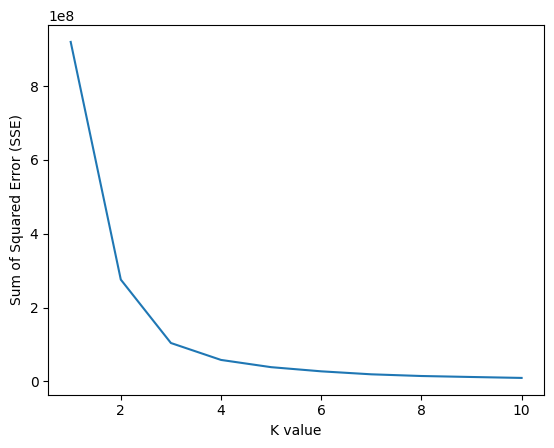

In [ ]:
plt.plot(k_range,sse)
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error (SSE)')

Clustering

In [ ]:
k = 3
clustering = KMeans(n_clusters=k)
clusters = clustering.fit_predict(df[['age','annual_income($)']])
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Question 2**: Why the value of *k* is 3?

By the Elbow method where the inflection point was precisely 3.

Adding the cluster to the dataset

In [ ]:
df['cluster'] = clusters
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               150 non-null    int64
 1   annual_income($)  150 non-null    int64
 2   cluster           150 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 3.1 KB


,age,annual_income($),cluster
0,17,17123,2
1,17,18375,2
2,16,18557,2
3,23,17721,2
4,22,17291,2


Drawing the clusters

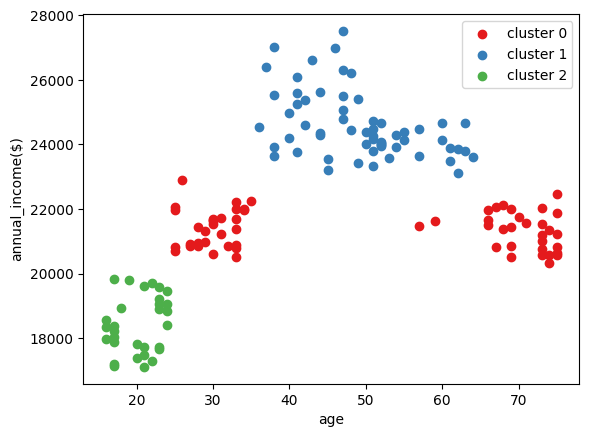

In [ ]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['age'],df0['annual_income($)'],color='#e41a1c',label='cluster 0')
plt.scatter(df1['age'],df1['annual_income($)'],color='#377eb8',label='cluster 1')
plt.scatter(df2['age'],df2['annual_income($)'],color='#4daf4a',label='cluster 2')
plt.xlabel('age')
plt.ylabel('annual_income($)')
plt.legend()

**Question 3**: What do you think about the clusters? Do they make sense?

The groups seem to make sense for the most part. Initially, there is a clear trend of increasing income with age, starting from a low point in the 20s and reaching a maximum in the 40-50 age range. However, there is an anomaly in the 60-70 age range where income falls to a level similar to that in the 30-40 age range. This inconsistency raises questions about the grouping. There are likely distinct subgroups within these age ranges, suggesting the need for more nuanced analysis to accurately identify and separate these groups.

Normalizing the dataset

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['annual_income($)']])
df['norm_annual_income($)'] = scaler.transform(df[['annual_income($)']])

scaler.fit(df[['age']])
df['norm_age'] = scaler.transform(df[['age']])

**Question 4**: What does the MinMaxScaler function?

Basically, it transforms the values of one or more characteristics to a specific range. In this case, the purpose of scaling is to normalize the ranges of different characteristics, thus contributing equally to the analysis.



Obtaining the *k* value from the normalized values

In [ ]:
norm_sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['norm_age','norm_annual_income($)']])
  norm_sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualizing the Elbow plot from the normalized values

Text(0, 0.5, 'Sum of Squared Error (SSE)')

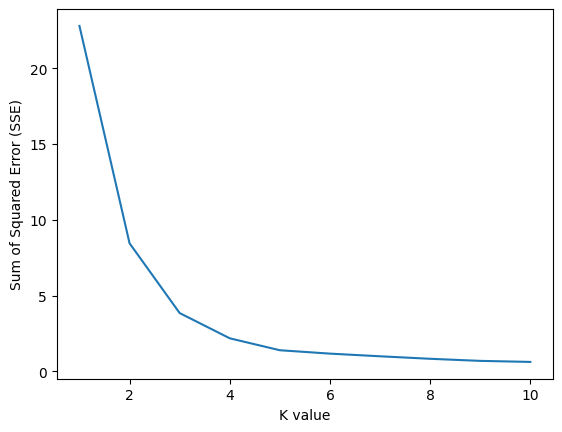

In [ ]:
plt.plot(k_range,norm_sse)
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error (SSE)')

Clustering normalized values

In [ ]:
k = 4
clustering = KMeans(n_clusters=k)
norm_cluster =  clustering.fit_predict(df[['norm_age','norm_annual_income($)']])
norm_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Adding the normalized values to the dataset

In [ ]:
df['norm_cluster'] = norm_cluster
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    150 non-null    int64  
 1   annual_income($)       150 non-null    int64  
 2   cluster                150 non-null    int32  
 3   norm_annual_income($)  150 non-null    float64
 4   norm_age               150 non-null    float64
 5   norm_cluster           150 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 6.0 KB


,age,annual_income($),cluster,norm_annual_income($),norm_age,norm_cluster
0,17,17123,2,0.001632,0.016949,3
1,17,18375,2,0.121855,0.016949,3
2,16,18557,2,0.139332,0.000000,3
3,23,17721,2,0.059055,0.118644,3
4,22,17291,2,0.017765,0.101695,3


Visualizing the normalized clusters

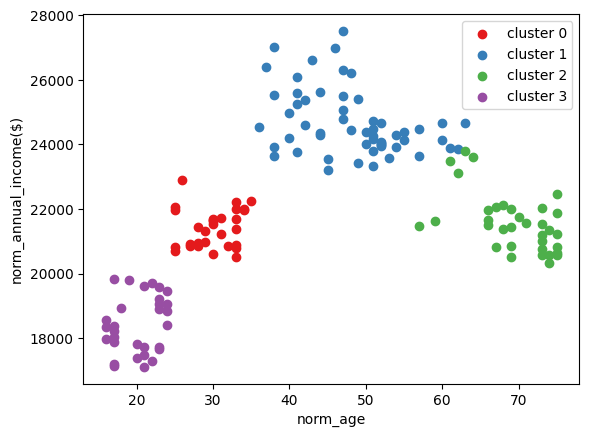

In [ ]:
df0 = df[df.norm_cluster==0]
df1 = df[df.norm_cluster==1]
df2 = df[df.norm_cluster==2]
df3 = df[df.norm_cluster==3]
plt.scatter(df0['age'],df0['annual_income($)'],color='#e41a1c',label='cluster 0')
plt.scatter(df1['age'],df1['annual_income($)'],color='#377eb8',label='cluster 1')
plt.scatter(df2['age'],df2['annual_income($)'],color='#4daf4a',label='cluster 2')
plt.scatter(df3['age'],df3['annual_income($)'],color='#984ea3',label='cluster 3')
plt.xlabel('norm_age')
plt.ylabel('norm_annual_income($)')
plt.legend()

**Question 5**: Why are the clusters different before the normalization process?

They are different because the normalization given by the MinMaxScaler helps scale all characteristics to a common range, thus mitigating the impact of differences in the original magnitudes of age and income, facilitating a more equitable comparison and grouping process. This is why the analysis looks fairer and therefore prevents features with larger scales from dominating the grouping results.

# Hierarchical clustering

Importing libraries

In [ ]:
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Generating a random dataset

In [ ]:
X, y= make_blobs(n_samples=50,centers=4)
# X: the generated samples
# y: the integer labels for cluster memebership of each sample
# centers: the number of centers to generate
print(X)
print(y)

[[ 4.18556552  3.11135054]
 [-4.68633905 10.37863772]
 [ 3.76788112  1.12200561]
 [ 4.93925867  2.23957758]
 [ 5.34382554  2.36912293]
 [-6.50686488  6.08928605]
 [-9.5500651   4.74176709]
 [ 4.10604431  2.91498585]
 [-6.53671963  5.70957892]
 [-6.36616776  4.38206862]
 [-7.09427439  5.88405094]
 [ 3.61425782  3.10969268]
 [ 6.65294201  2.39060124]
 [ 5.16373506  4.33938685]
 [ 3.70107767  3.54034364]
 [ 4.29214729  2.80277426]
 [-4.42458488 10.146257  ]
 [-6.92063914  5.8687765 ]
 [-5.41897661  6.79147731]
 [ 4.41236777  3.34446562]
 [ 3.6449128   1.23324877]
 [-3.66177458  9.96728717]
 [ 2.50085964  1.83572679]
 [-4.80070688  9.56343175]
 [ 5.27924499  3.54159201]
 [-4.45919286  8.57912187]
 [-5.76102007  9.76733282]
 [-4.20025326  8.87222561]
 [ 5.38890739  3.91749805]
 [ 3.37659161  1.58239953]
 [-6.06865745  4.78739179]
 [-6.33560959  6.48585731]
 [ 2.25820527  5.20639624]
 [-4.49152648  9.86618017]
 [ 4.68441729  2.61461363]
 [ 3.8658496   1.86984481]
 [-3.60688884  9.91539806]
 

Visualizing the blobs

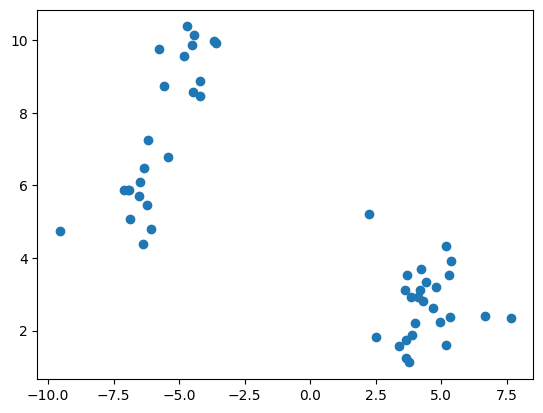

In [ ]:
plt.scatter(X[:,0],X[:,1])

Identifying the clusters

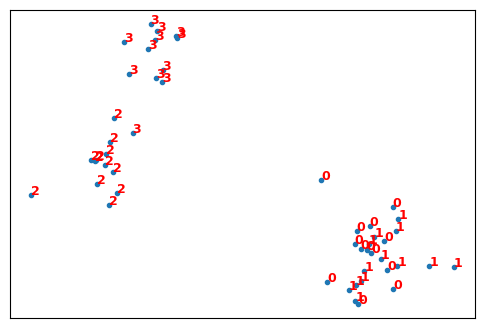

In [ ]:
# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

X = (X - x_min)/(x_max - x_min)

for i in range(X.shape[0]):
  plt.text(X[i,0],X[i,1],str(y[i]),color='red',fontdict={'weight':'bold','size':9})

plt.xticks([])
plt.yticks([])

plt.scatter(X[:,0],X[:,1],marker='.')
plt.show()


Calculate the distance matrix

In [ ]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 0.93933507, 0.21627749, ..., 0.65731181, 0.677183  ,
        0.06215644],
       [0.93933507, 0.        , 1.11423928, ..., 0.53761513, 0.587104  ,
        0.88923525],
       [0.21627749, 1.11423928, 0.        , ..., 0.7476976 , 0.7518199 ,
        0.27827874],
       ...,
       [0.65731181, 0.53761513, 0.7476976 , ..., 0.        , 0.05702607,
        0.6377014 ],
       [0.677183  , 0.587104  , 0.7518199 , ..., 0.05702607, 0.        ,
        0.66233336],
       [0.06215644, 0.88923525, 0.27827874, ..., 0.6377014 , 0.66233336,
        0.        ]])

**Question 6**: Explain the structure of this matrix

The structure is a pairwise distance matrix between points in the data set.

Basically, it is a square matrix, it has the same number of rows and columns.
The elements of the diagonal are what represent the distance of each point from itself. In fact, it can be seen that these values are always 0 since a point is at a distance of 0 from itself. It is symmetrical because the distance between point i and point j is the same as the distance between point j and point i. However, it should be noted that the non-diagonal elements contain the pairwise distances between the corresponding points.

The values of the matrix are the distances calculated using a metric between each pair of points in your data set, if it is not specified as in this case, it is calculated by default by the Euclidean distance.

Visualizing the dendogram

<ipython-input-40-0e939e40ceda>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, method=linkage_method)


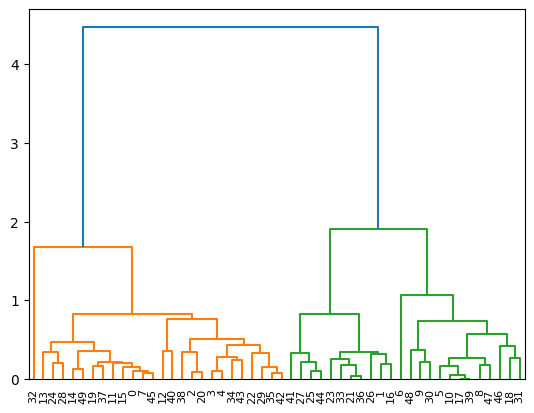

In [ ]:
linkage_method = 'average'
#complete
#single
#average

Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo = hierarchy.dendrogram(Z)

new one

<ipython-input-51-738b6bab505b>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, method=linkage_method)


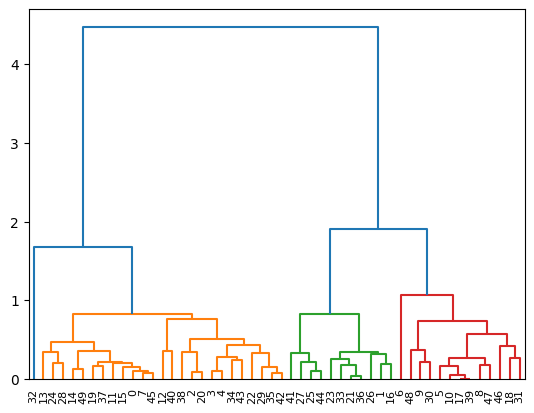

In [ ]:
linkage_method = 'average'
Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo = hierarchy.dendrogram(Z, color_threshold=1.5)  # Adjust the threshold as needed

In [ ]:
# sklearn method
# linkage_method = 'average'
# complete
# single
# average

# hac = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)

<ipython-input-52-bb487d80650a>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(dist_matrix, method=linkage_method)


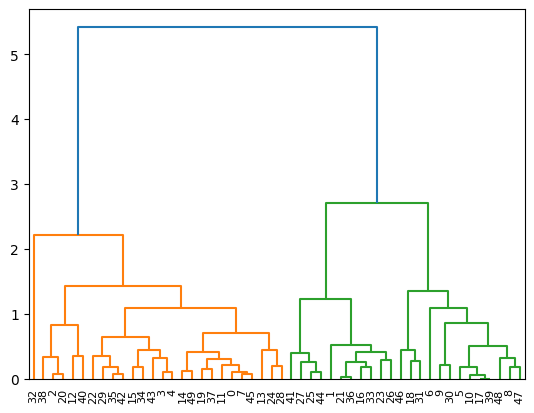

In [ ]:
linkage_method = 'complete'
Z_complete = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo_complete = hierarchy.dendrogram(Z_complete)

<ipython-input-54-cc9a0a2d8098>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(dist_matrix, method=linkage_method)


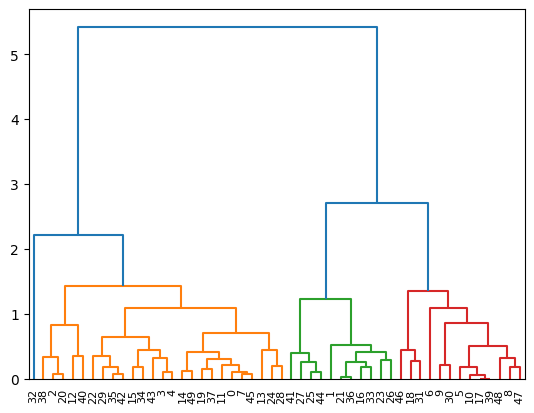

In [ ]:
linkage_method = 'complete'
Z_complete = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo_complete = hierarchy.dendrogram(Z_complete, color_threshold=1.5)

<ipython-input-43-1d851b02292f>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(dist_matrix, method=linkage_method)


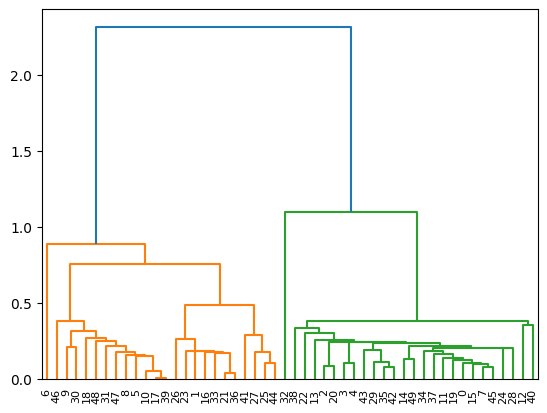

In [ ]:
linkage_method = 'single'
Z_single = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo_single = hierarchy.dendrogram(Z_single)

<ipython-input-55-ac2c4d95b21e>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(dist_matrix, method=linkage_method)


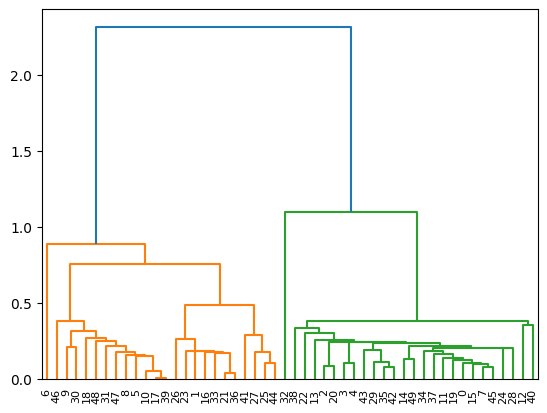

In [ ]:
linkage_method = 'single'
Z_single = hierarchy.linkage(dist_matrix, method=linkage_method)
dendo_single = hierarchy.dendrogram(Z_single, color_threshold=1.5)

**Question 7**: How many clusters can you identify in the dendrogram. Is it easy to see?

Two are directly seen by the dendrogram, however, there are really 4, so the identification is really ambiguous and is not as clear as it should be.

**Question 8**: Explain the organization of the clusters?

The organization of the clusters is ambiguous as I said, since there are 4 centers, however, each two centers are considered parts of a cluster because they are not really that far from each other, that is, they are not very marked, and it occupies every two groups a cluster with a certain color (orange for a pair, and green for the other pair), obtaining only two clusters. However, if it were more robust, a better interpretation could be handled

**Question 9**: Use the complete, single, and average method. Do you see any difference between them? Discuss your answer.

Not really, they all make the same mistake. And it is certainly frustrating because in the complete and single, you see more divisions but they still appear in the same cluster. I suppose the centers are very united. Something interesting is that if a color_threshold is applied, there is a change in what corresponds to a better grouping and you can see 3 clusters for the groupings that are least intertwined, so I understand that by modifying the code you can achieve better robustness .